In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('swiss_bank_notes.txt')

In [65]:
df.head()

,Length,Left,Right,Bottom,Top,Diagonal,Status
0,214.8,131.0,131.1,9.0,9.7,141.0,counterfeit
1,214.6,129.7,129.7,8.1,9.5,141.7,counterfeit
2,214.8,129.7,129.7,8.7,9.6,142.2,counterfeit
3,214.8,129.7,129.6,7.5,10.4,142.0,counterfeit
4,215.0,129.6,129.7,10.4,7.7,141.8,counterfeit


In [66]:
df.shape

(200, 7)

In [67]:
df.describe()

,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


In [68]:
df.dtypes

Length      float64
Left        float64
Right       float64
Bottom      float64
Top         float64
Diagonal    float64
Status       object
dtype: object

In [69]:
df['Status'].value_counts()

counterfeit    100
genuine        100
Name: Status, dtype: int64

In [70]:
import matplotlib.pyplot as plt

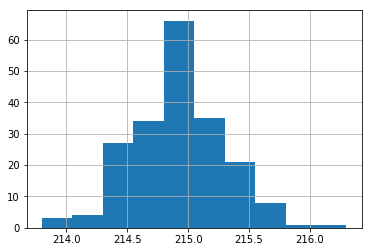

In [71]:
df.Length.hist();

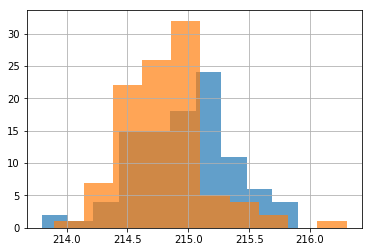

In [72]:
df.groupby('Status')['Length'].hist(alpha=0.7);

In [73]:
from pandas.plotting import scatter_matrix

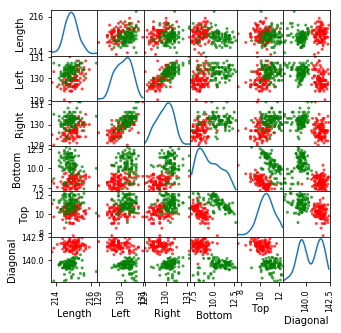

In [74]:
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df, figsize=(5, 5), diagonal='kde', c=df['Status'].replace(colors), alpha=0.72);

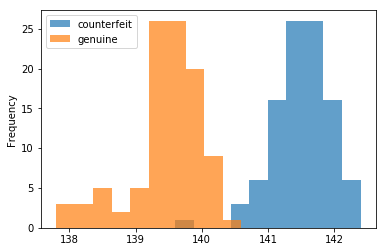

In [75]:
df.groupby('Status')['Diagonal'].plot.hist(alpha=0.7)
plt.legend();

In [76]:
df.Status = df.Status.map({'genuine': 0, 'counterfeit': 1})

In [77]:
df.head(3)

,Length,Left,Right,Bottom,Top,Diagonal,Status
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1


In [78]:
df['MyStatus'] = df.Diagonal.apply(lambda x: 1 if x > 140.5 else 0)

In [79]:
df.head(3)

,Length,Left,Right,Bottom,Top,Diagonal,Status,MyStatus
0,214.8,131.0,131.1,9.0,9.7,141.0,1,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1,1


In [80]:
df[df.Status != df.MyStatus]

,Length,Left,Right,Bottom,Top,Diagonal,Status,MyStatus
69,214.9,130.2,130.2,8.0,11.2,139.6,1,0
112,215.4,130.7,131.1,9.7,11.8,140.6,0,1


In [81]:
res = 1.0 - len(df[df.Status != df.MyStatus]) / len(df)
print('accuracy = %.3f%%' % (res*100))

accuracy = 99.000%
